In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, f_oneway
import pingouin as pg
from statsmodels.stats import oneway
import glob
%matplotlib widget

In [12]:
def plot_growth_area(heavy_metal, pooled_data, concentrations):
    observation_days = [i for i in range(1,6)]
    replicate_labels = [f"Replicate {n}" for n in range(1,4)]
    concentration_names = [f"{conc} ppm" for conc in concentrations]

    hm_line, axes = plt.subplots(4,1, figsize=(10,8.5))

    hm_line.suptitle(f"Growth in {heavy_metal}\n")
    hm_line.supxlabel("Growth Duration (Days)")
    hm_line.supylabel("Growth Area (mm$^{2}$)")

    for concentration, name, axis in zip(pooled_data, concentration_names, axes):
        axis.set(title=name,
                xticks=observation_days,
                xticklabels=observation_days)
        for replicate_growth, label in zip(concentration.columns[1:], replicate_labels):
            axis.plot(observation_days, (concentration[replicate_growth]), label=label, marker='.', linestyle="-")

        axis.legend(fontsize=6)

    hm_line.tight_layout()

def plot_growth_area_ave(heavy_metal, pooled_data, concentrations):
    observation_days = [i for i in range(1,6)]
    concentration_names = [f"{conc} ppm" for conc in concentrations]
    ave_growth = [df.iloc[:,1:].mean(axis=1) for df in pooled_data]
    std_growth = [df.iloc[:,1:].std(axis=1) for df in pooled_data]

    hm_line, axis = plt.subplots(1,1, figsize=(10,5))

    hm_line.suptitle(f"Mean Growth Area in Different {heavy_metal} Concentrations")
    hm_line.supxlabel("Growth Duration (Days)")
    hm_line.supylabel("Growth Area (mm$^{2}$)")

    for concentration, std, name in zip(ave_growth, std_growth, concentration_names):
        axis.plot(observation_days, concentration, label=name, marker='.', linestyle="-")
        axis.errorbar(observation_days, concentration,  yerr=std, fmt='.', color='black', capsize=2.5)

    axis.set(xticks=observation_days,
             xticklabels=observation_days)

    axis.legend(fontsize=6)

def plot_growth_area_box(heavy_metal, pooled_data, concentrations):
    observation_days = [i for i in range(1,6)]
    concentration_names = [f"{conc} ppm" for conc in concentrations]

    hm_line, axis = plt.subplots(1,1, figsize=(10,5))

    hm_line.suptitle(f"Growth Area in Different {heavy_metal} Concentrations")
    hm_line.supxlabel("Growth Duration (Days)")
    hm_line.supylabel("Growth Area (mm$^{2}$)")

    axis.boxplot(pooled_data)

<h1 style='text-align:center'>Growth Area Analysis</h1>

<h2>Cadmium<h2>

In [3]:
cd_paths = glob.glob("growth_area/Cd*.csv")
cd_0_25, cd_0_5, cd_0, cd_1 = [pd.read_csv(path) for path in cd_paths]
cd_concentrations = [0, 0.25, 0.5, 1]
cd_pooled=[cd_0, cd_0_25, cd_0_5, cd_1]

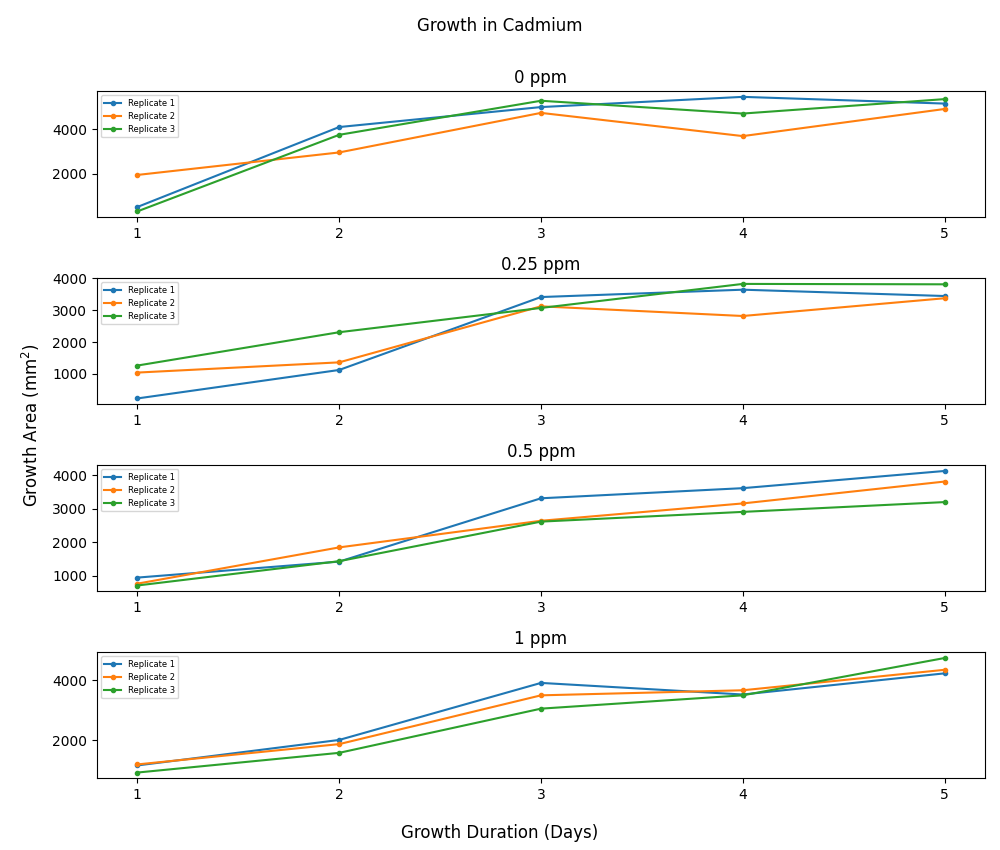

In [4]:
plot_growth_area("Cadmium", cd_pooled, cd_concentrations)

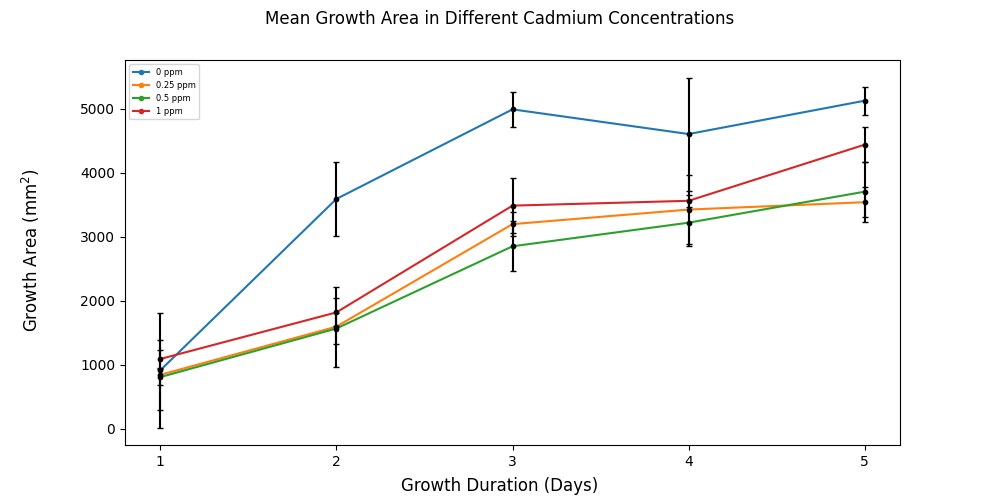

In [5]:
plot_growth_area_ave("Cadmium", cd_pooled, cd_concentrations)

ValueError: X must have 2 or fewer dimensions

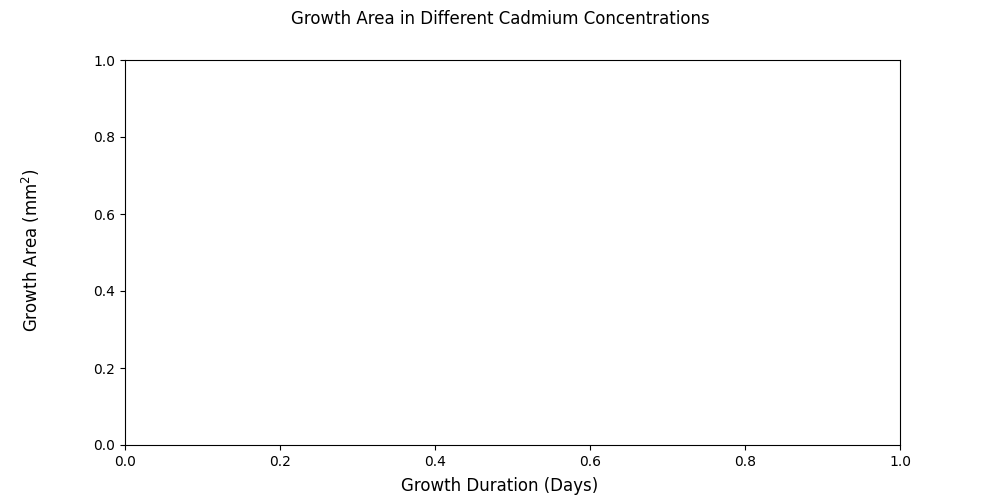

In [13]:
plot_growth_area_box("Cadmium", cd_pooled, cd_concentrations)

<h2>Nickel</h2>

In [6]:
ni_paths = glob.glob("growth_area/Ni*.csv")
ni_0, ni_12_5, ni_25, ni_50 = [pd.read_csv(path) for path in ni_paths]
ni_concentration = [0, 12.5, 25, 50]
ni_pooled=[ni_0, ni_12_5, ni_25, ni_50]

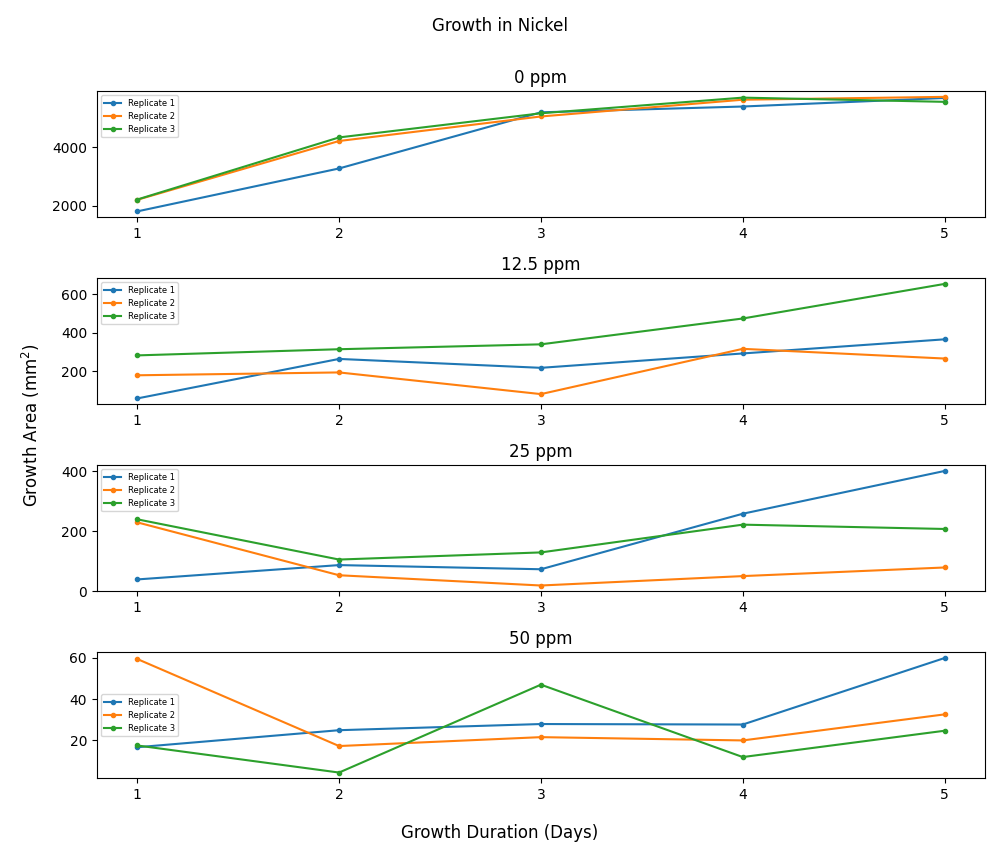

In [7]:
plot_growth_area("Nickel", ni_pooled, ni_concentration)

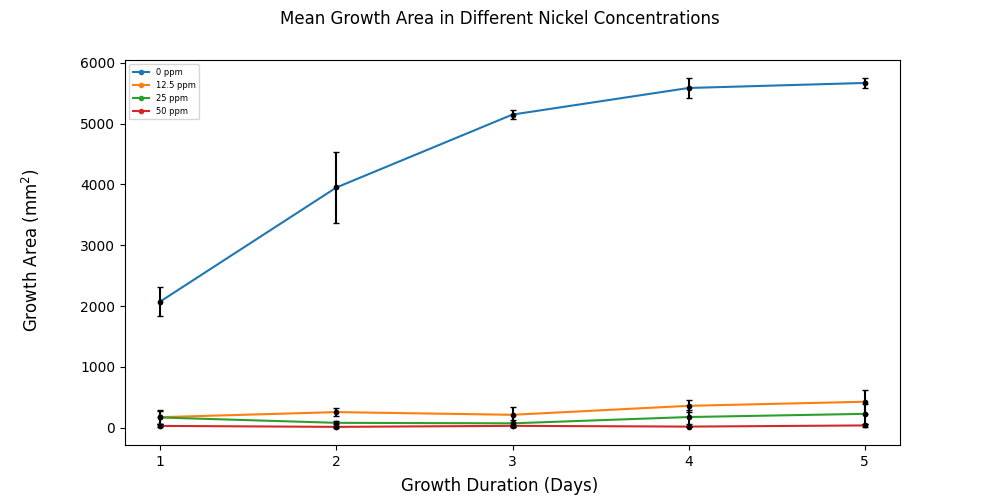

In [8]:
plot_growth_area_ave("Nickel", ni_pooled, ni_concentration)

<h2>Zinc</h2>

In [9]:
zn_paths = glob.glob("growth_area/Zn*.csv")
zn_0, zn_100, zn_200, zn_50 = [pd.read_csv(path) for path in zn_paths]
zn_concentration = [0, 50, 100, 200]
zn_pooled=[zn_0, zn_50, zn_100, zn_200]

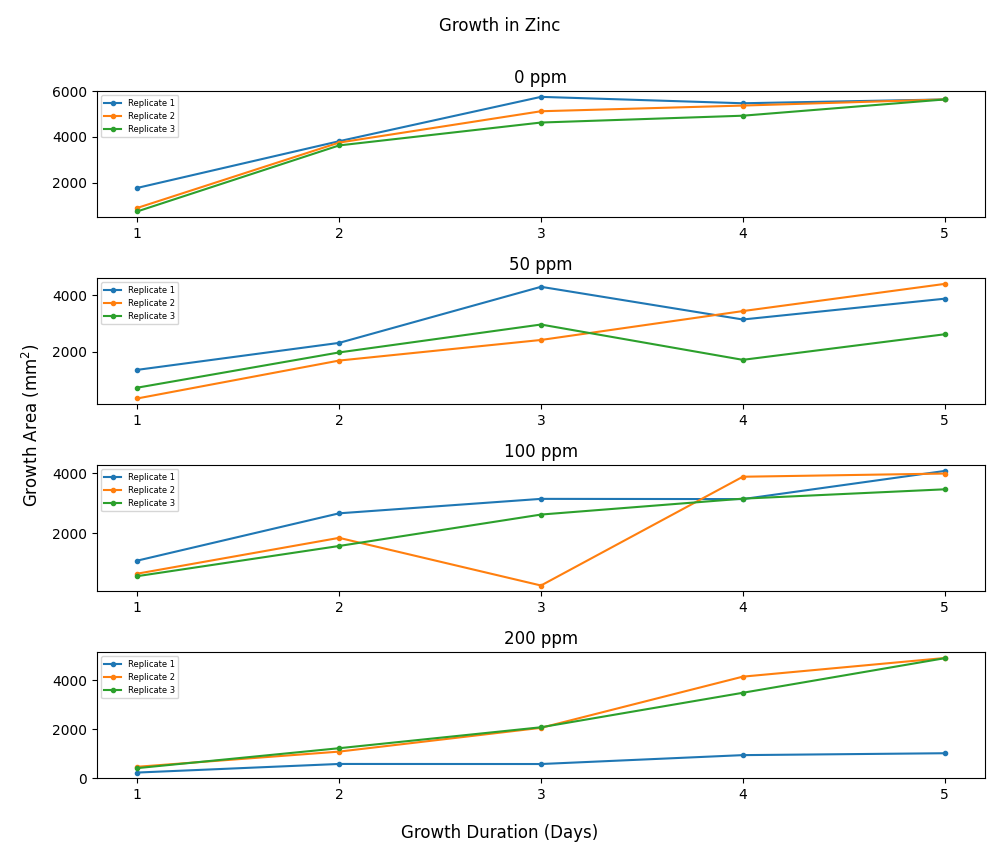

In [10]:
plot_growth_area("Zinc", zn_pooled, zn_concentration)

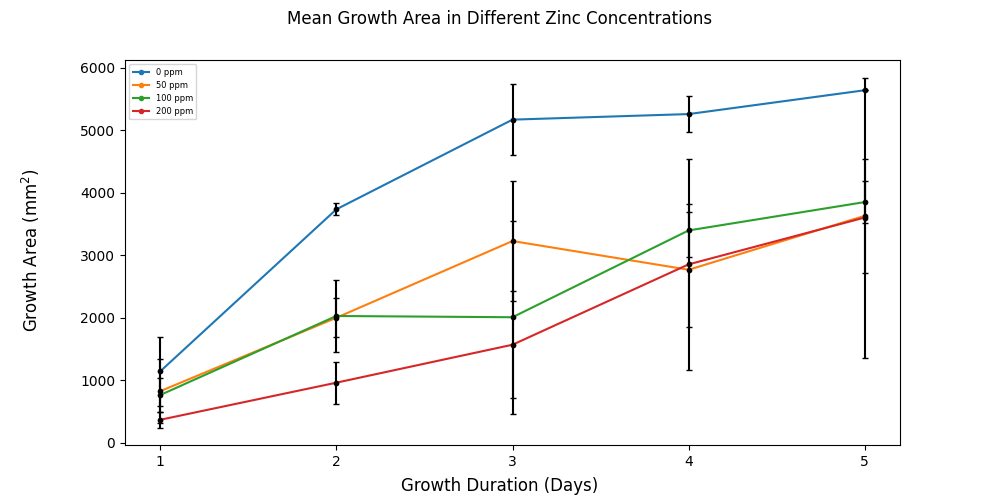

In [11]:
plot_growth_area_ave("Zinc", zn_pooled, zn_concentration)